## **Importing required Libraries**

In [17]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## **Loading Dataset**

In [18]:
# Load the dataset

file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

## **Exploring data**

In [19]:
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [20]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## **Data cleaning**

In [22]:
# Keep only the necessary columns
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [23]:
# Encode the labels: 'spam' as 1 and 'ham' as 0
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

<ipython-input-23-013138739da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


## **Visualizing data**

<ipython-input-24-3013aaadf097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='viridis')


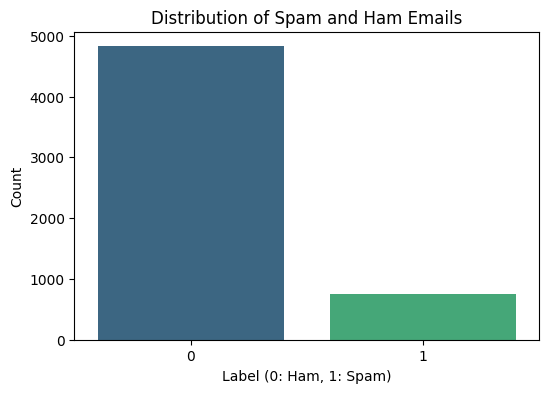

In [24]:
# Visualize the distribution of spam and ham
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='viridis')
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

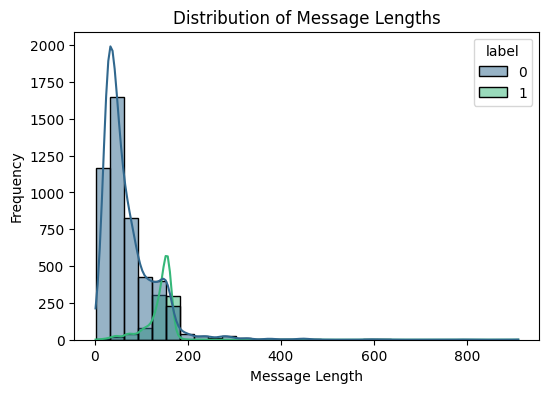

In [25]:

# Visualize the length of messages
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='text_length', bins=30, kde=True, hue='label', palette='viridis')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

## **Training the model**

In [26]:
# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english')

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [28]:
# Transform the text data to feature vectors
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)# Build the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 96.68161434977578
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 37 113]]


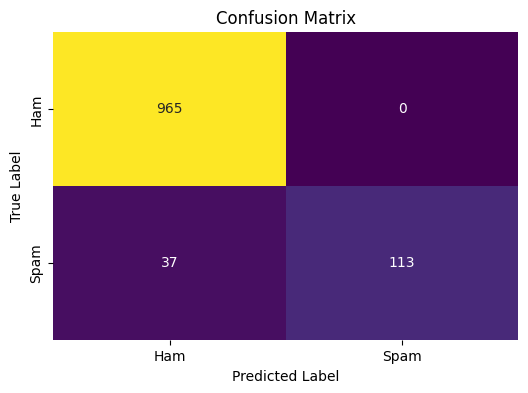

In [30]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Testing model using sample mail**

In [31]:
# Test the model with example inputs
sample = [
    "Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize.",
    "Hi there, I wanted to discuss the project details with you. Let me know your availability.",
    "Urgent: Your account has been compromised. Please reset your password immediately."
]

# Transform the example inputs to feature vectors
sample_1 = vectorizer.transform(sample)

# Predict the labels for the example inputs
sample_predictions = model.predict(sample_1)

# Map the predicted labels back to 'ham' or 'spam'
label_map = {0: 'ham', 1: 'spam'}
sample_results = [label_map[pred] for pred in sample_predictions]

# Print the results
for email, result in zip(sample, sample_results):
    print(f"Email: {email}\nPrediction: {result}\n")

Email: Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize.
Prediction: spam

Email: Hi there, I wanted to discuss the project details with you. Let me know your availability.
Prediction: ham

Email: Urgent: Your account has been compromised. Please reset your password immediately.
Prediction: ham

